# Effect of Snapshot Integration

Let the sky temperature be $T(x,y,z)$ where $(x,y)$ are comoving coordinates in the sky plane and $z$ is comoving in the LOS.

The fourier transform $\tilde{T}$ is

$$
    \tilde{T}(\vec{k}) = \int T(x,y,z) e^{-i 2\pi \vec{k}\cdot\vec{x}} d \vec{x}.
$$


And the power is 

$$
    P(\vec{k}) = \frac{\tilde{T}\tilde{T}^*}{V}
$$

Now, let's assume that the sky is rotating in the $x$ direction such that in a single snapshot, it moves by a total $\Delta x$. Within this time, we are averaging visibilities. In reality, this will be a discrete sum (I think), but let's write it as continuous:

$$
    \tilde{T}'(\vec{k}) = \int_0^{\Delta x} dx' \int T(x-x',y,z) e^{-i 2\pi \vec{k}\cdot\vec{x}} d \vec{x}.
$$

From here, let's use the Fourier Shift Theorem:

\begin{align}
    \tilde{T}'(\vec{k}) &= \frac{1}{\Delta x}\int_0^{\Delta x} dx' e^{-i 2\pi k_x x'} \int T(x,y,z) e^{-i 2\pi \vec{k}\cdot\vec{x}} d \vec{x} \\
    &= \tilde{T}(\vec{k}) \frac{1}{\Delta x} \int_0^{\Delta x} dx' e^{-i 2\pi k_x x'} \\
    &= \frac{i}{\Delta x 2\pi k_x} (e^{-i2\pi k_x \Delta x} - 1) \tilde{T}(\vec{k}).
\end{align}

Taking the power, we get then

$$
   P'(\vec{k}) = \frac{1 - \cos(2\pi \Delta x k_x)}{2\pi^2 (\Delta x)^2 k_x^2} P(\vec{k})
$$

This is $P(\vec{k})$ when $\Delta x \rightarrow 0$, but is zero at $\Delta x = 1/k_x$.

Now, for HERA, which has an integration time of 10 seconds, and a declination of $30^\degree$, $\Delta x$ is:

$$
    \Delta x \approx 2\pi \cos(30) \frac{10}{86400} D_c(z)
$$

which is $\Delta x = 0.59$ Mpc/$h$ at $\nu=250$ MHz and $\Delta x = 0.87$ Mpc/$h$ at $\nu=50$ MHz

On the other hand, $k_x$ is given by the baseline lengths:

$$
    k_x = \frac{b}{\lambda} \frac{2\pi}{D_c(z)}
$$

So, $\Delta x k_x$ is given by

$$
    \Delta x k_x \approx \cos(30) \frac{10}{86400} \frac{b}{\lambda}
$$

In [15]:
def pdim(xk):
    return (1 - np.cos(2*np.pi*xk))/(2*np.pi**2 * xk**2)

In [16]:
xk = np.linspace(0, 1, 100)

In [34]:
def plot_signal_loss(nu):
    b = np.linspace(14, 300, 100)
    u = b / (300 / nu)
    xk = np.cos(np.pi/6) * 10/86400 * u
    
    plt.plot(b, 100*(pdim(xk) - 1))
    plt.xlabel("Baseline Length (m)")
    plt.ylabel("Signal Loss (%)")
    plt.title(f"Signal Loss, freq={nu} MHz")


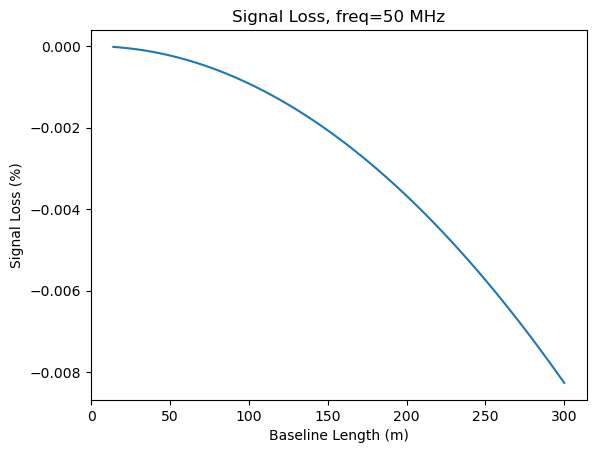

In [35]:
plot_signal_loss(nu = 50)

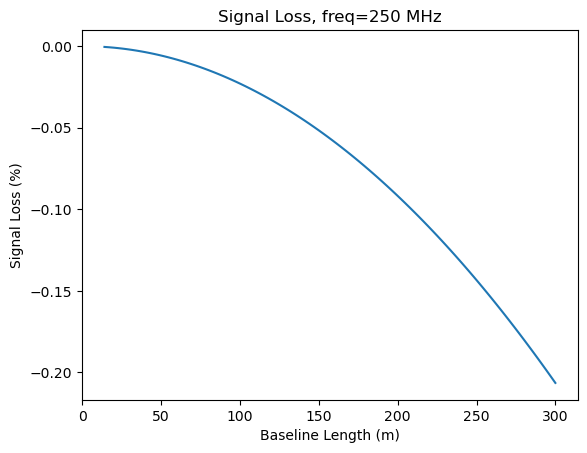

In [36]:
plot_signal_loss(250)